In [5]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import datetime

In [6]:
dir_path='/u02/data/poc5/20211214_2nd_data_collection/parquet/'
run_id='20211216145545'
left_image_file=dir_path+'left_image_'+run_id+'.parquet'
right_image_file=dir_path+'right_image_'+run_id+'.parquet'

In [23]:
print(left_image_file)
print(right_image_file)

/u02/data/poc5/20211214_2nd_data_collection/parquet/left_image_20211216145545.parquet
/u02/data/poc5/20211214_2nd_data_collection/parquet/right_image_20211216145545.parquet


In [8]:
for file in [left_image_file, right_image_file]:
    pq_file = pq.ParquetFile(file)
    print(pq_file.metadata)
    print(pq_file.schema)

  created_by: parquet-cpp-arrow version 6.0.0-SNAPSHOT
  num_columns: 10
  num_rows: 3832
  num_row_groups: 4
  format_version: 2.6
  serialized_size: 4047
required group field_id=-1 schema {
  required int64 field_id=-1 timestamp (Timestamp(isAdjustedToUTC=true, timeUnit=nanoseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional group field_id=-1 header {
    optional group field_id=-1 stamp {
      optional int32 field_id=-1 sec;
      optional int32 field_id=-1 nanosec (Int(bitWidth=32, isSigned=false));
    }
    optional binary field_id=-1 frame_id (String);
  }
  optional int32 field_id=-1 height (Int(bitWidth=32, isSigned=false));
  optional int32 field_id=-1 width (Int(bitWidth=32, isSigned=false));
  optional binary field_id=-1 encoding (String);
  optional boolean field_id=-1 is_bigendian;
  optional int32 field_id=-1 step (Int(bitWidth=32, isSigned=false));
  optional binary field_id=-1 image_oid (String);
}

  created_by: parquet-cpp-arrow versi

In [9]:
left_image_table = pq.read_table(left_image_file)
left_image_table.schema

timestamp: timestamp[ns, tz=UTC] not null
header: struct<stamp: struct<sec: int32, nanosec: uint32>, frame_id: string>
  child 0, stamp: struct<sec: int32, nanosec: uint32>
      child 0, sec: int32
      child 1, nanosec: uint32
  child 1, frame_id: string
height: uint32
width: uint32
encoding: string
is_bigendian: bool
step: uint32
image_oid: string

In [11]:
left_image_table =left_image_table.flatten().flatten()
left_image_df=left_image_table.to_pandas()
# left_image_df=left_image_df.sort_values(by=['timestamp'])
left_image_df.head()

,timestamp,header.stamp.sec,header.stamp.nanosec,header.frame_id,height,width,encoding,is_bigendian,step,image_oid
0,2021-12-14 05:00:00.797010176+00:00,1639458000,797010095,FDS20110009,1536,2048,bayer_rggb16,False,4096,3631623832346430326638313638616646445332
1,2021-12-14 05:00:00.830345472+00:00,1639458000,830345445,FDS20110009,1536,2048,bayer_rggb16,False,4096,3631623832346430333137653130653546445332
2,2021-12-14 05:00:00.863578368+00:00,1639458000,863578483,FDS20110009,1536,2048,bayer_rggb16,False,4096,3631623832346430333337393239373346445332
3,2021-12-14 05:00:00.897224960+00:00,1639458000,897224938,FDS20110009,1536,2048,bayer_rggb16,False,4096,3631623832346430333537613930656146445332
4,2021-12-14 05:00:00.963078912+00:00,1639458000,963078957,FDS20110009,1536,2048,bayer_rggb16,False,4096,3631623832346430333936373662326446445332


In [12]:
left_timestamps = left_image_df['timestamp']

In [13]:
left_delta_df=pd.DataFrame(data=[(left_timestamps.iloc[i]-left_timestamps.iloc[i-1])/datetime.timedelta(milliseconds=1) for i in range(1,len(left_timestamps))],columns=['dt'])

In [14]:
# left_delta_df=left_delta_df[left_delta_df.dt < 100.0]
left_delta_df

,dt
0,33.335296
1,33.232896
2,33.646592
3,65.853952
4,33.891072
...,...
3826,33.333248
3827,33.485568
3828,33.319424
3829,66.498816


<AxesSubplot:ylabel='Frequency'>

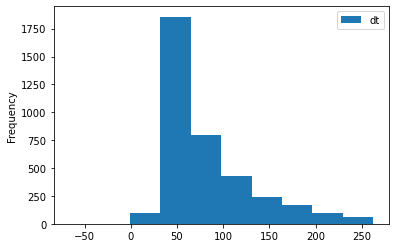

In [15]:
df=left_delta_df
df=df[np.abs(df.dt-df.dt.mean()) <= (3*df.dt.std())]
df.plot.hist(bins=10)

In [16]:
right_image_table = pq.read_table(right_image_file)
right_image_table.schema

timestamp: timestamp[ns, tz=UTC] not null
header: struct<stamp: struct<sec: int32, nanosec: uint32>, frame_id: string>
  child 0, stamp: struct<sec: int32, nanosec: uint32>
      child 0, sec: int32
      child 1, nanosec: uint32
  child 1, frame_id: string
height: uint32
width: uint32
encoding: string
is_bigendian: bool
step: uint32
image_oid: string

In [17]:
right_image_table=right_image_table.flatten().flatten()
right_image_df=right_image_table.to_pandas()
# right_image_df=right_image_df.sort_values(by=['timestamp'])
right_image_df.head()

,timestamp,header.stamp.sec,header.stamp.nanosec,header.frame_id,height,width,encoding,is_bigendian,step,image_oid
0,2021-12-14 05:00:00.697237760+00:00,1639458000,697237727,FDS20110008,1536,2048,bayer_rggb16,False,4096,3631623832346430323938663030646646445332
1,2021-12-14 05:00:00.798107136+00:00,1639458000,798107178,FDS20110008,1536,2048,bayer_rggb16,False,4096,3631623832346430326639323236326146445332
2,2021-12-14 05:00:00.864854016+00:00,1639458000,864854016,FDS20110008,1536,2048,bayer_rggb16,False,4096,3631623832346430333338636130303046445332
3,2021-12-14 05:00:00.897224960+00:00,1639458000,897224939,FDS20110008,1536,2048,bayer_rggb16,False,4096,3631623832346430333537613930656246445332
4,2021-12-14 05:00:01.031121664+00:00,1639458001,31121666,FDS20110008,1536,2048,bayer_rggb16,False,4096,3631623832346431316461653130324644533230


In [18]:
right_timestamps = right_image_df['timestamp']

In [19]:
right_delta_df=pd.DataFrame(data=[(right_timestamps.iloc[i]-right_timestamps.iloc[i-1])/datetime.timedelta(milliseconds=1) for i in range(1,len(right_timestamps))],columns=['dt'])

In [20]:
# right_delta_df=right_delta_df[right_delta_df.dt < 100.0]
right_delta_df

,dt
0,100.869376
1,66.746880
2,32.370944
3,133.896704
4,33.168128
...,...
3839,133.410560
3840,34.149376
3841,32.647936
3842,33.124352


<AxesSubplot:ylabel='Frequency'>

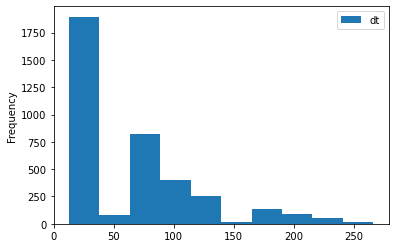

In [22]:
df=right_delta_df
df=df[np.abs(df.dt-df.dt.mean()) <= (3*df.dt.std())]
df.plot.hist(bins=10)